In [1]:
from config import *
import os
from merge import WaveObject

In [61]:
from pydub import AudioSegment, effects
from pydub.playback import play

In [5]:
music1 = AudioSegment.from_file(str(test_data / "music1.wav"), format="wav") # 44.1 kHz 16 bit
music2 = AudioSegment.from_file(str(test_data / "music2.wav"), format="wav") # 44.1 kHz 16 bit
speech1 = AudioSegment.from_file(str(test_data / "voice1.wav"), format="wav") # 44.1 kHz 16 bit
speech2 = AudioSegment.from_file(str(test_data / "voice2.wav"), format="wav") # 44.1 kHz 16 bit

In [6]:
def get_median_dBFS(path):
    """Calculates the median dBFS value of all .wav files in the given directory."""
    dBFS_values = []
    for filename in path.iterdir():
        if filename.suffix != ".wav":
            continue
        audio = AudioSegment.from_file(str(path / filename), format="wav")
        dBFS_values.append(audio.dBFS)
    
    median = sorted(dBFS_values)[len(dBFS_values) // 2]
    return median

In [7]:
median_test_data = get_median_dBFS(test_data) # -21.55
median_test_data

-21.553987442786596

In [8]:
for filename in test_data.iterdir():
    if filename.suffix != ".wav":
        continue
    audio = AudioSegment.from_file(str(filename), format="wav")
    print(f"{filename.name}: {audio.dBFS}")

music2.wav: -23.13888046938965
music3.wav: -21.553987442786596
music1.wav: -22.479710462412292
voice2.wav: -19.66155602783681
voice3.wav: -22.913552927255097
voice1.wav: -18.733923010665663


In [9]:
def normalize_dBFS(path, target_dBFS, new_path):
    os.makedirs(new_path, exist_ok=True)
    """Normalizes all .wav files in the given directory to the target dBFS value."""
    for filename in path.iterdir():
        if filename.suffix != ".wav":
            continue
        audio = AudioSegment.from_file(str(path / filename), format="wav")
        audio = audio.apply_gain(target_dBFS - audio.dBFS)
        filename = filename.stem + "_normalized.wav"
        audio.export(str(new_path / filename), format="wav")

In [10]:
normalized_data = home / "sound-merge" / "tests" / "normalized_data"

In [11]:
normalize_dBFS(test_data, median_test_data, normalized_data)

In [12]:
print(f"median: {get_median_dBFS(normalized_data)}")
for filename in normalized_data.iterdir():
    if filename.suffix != ".wav":
        continue
    audio = AudioSegment.from_file(str(filename), format="wav")
    print(f"{filename.name}: {audio.dBFS}")

median: -21.553987442786596
music2_normalized.wav: -21.553987442786596
music3_normalized.wav: -21.553987442786596
voice1_normalized.wav: -21.553987442786596
music1_normalized.wav: -21.553987442786596
voice3_normalized.wav: -21.557158054115128
voice2_normalized.wav: -21.553987442786596


In [16]:
voice1_normalized = AudioSegment.from_file(str(normalized_data / "voice1_normalized.wav"), format="wav")

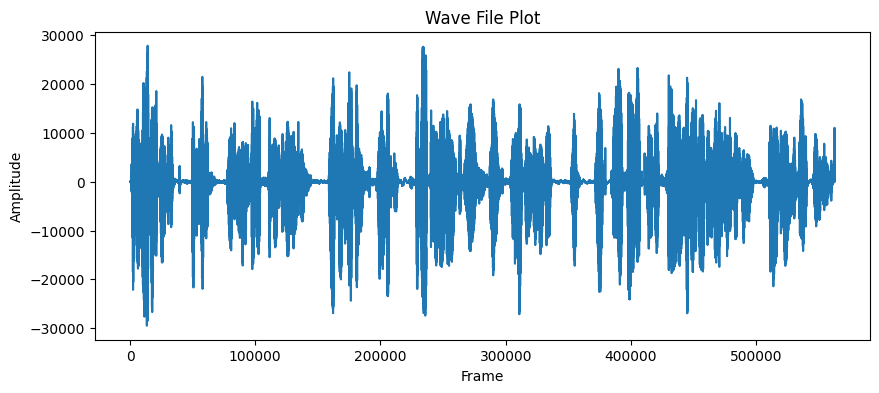

In [18]:
WaveObject.display_waveform_from_audiosegment(speech1)

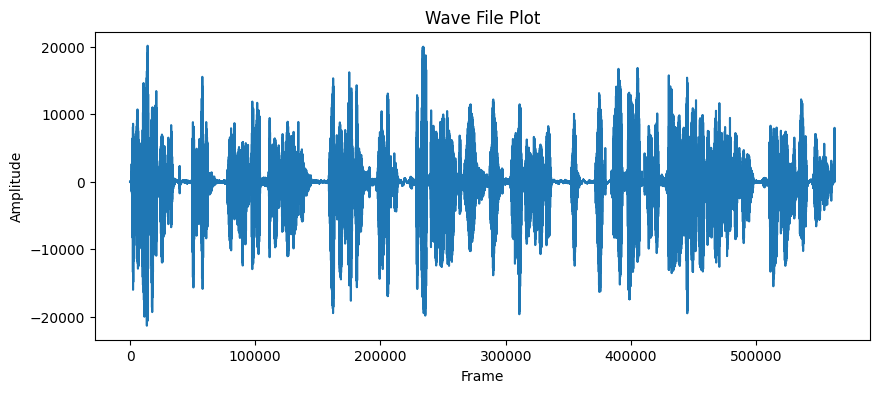

In [19]:
WaveObject.display_waveform_from_audiosegment(voice1_normalized)

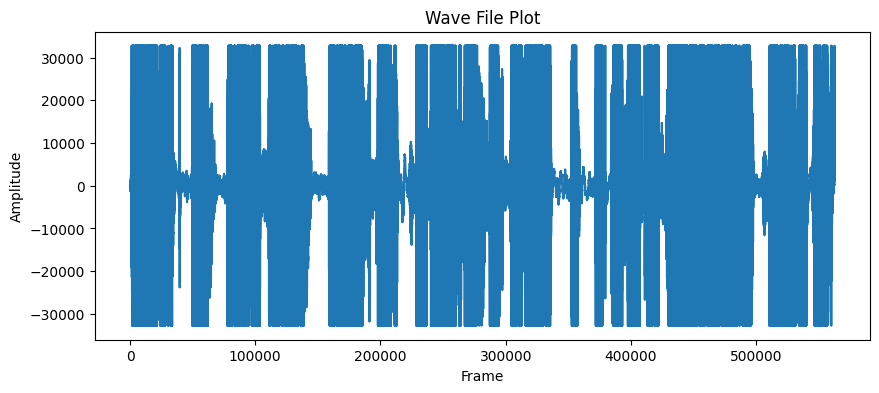

In [67]:
audio_ = speech1 + 20
WaveObject.display_waveform_from_audiosegment(audio_)

In [68]:
audio_.dBFS

-4.779303057006685

In [69]:
audio_.max_dBFS

0.0

In [70]:
audio_.export(test_data / "weird.wav", format="wav")

<_io.BufferedRandom name='/Users/glebmokeev/audio-projects/sound-merge/tests/data/weird.wav'>

In [71]:
for filename in test_data.iterdir():
    if filename.suffix != ".wav":
        continue
    audio = AudioSegment.from_file(str(filename), format="wav")
    print(f"{filename.name}: {audio.dBFS}")

music2.wav: -23.13888046938965
music3.wav: -21.553987442786596
music1.wav: -22.479710462412292
weird.wav: -4.779303057006685
voice2.wav: -19.66155602783681
voice3.wav: -22.913552927255097
voice1.wav: -18.733923010665663


In [72]:
normalize_dBFS(test_data, get_median_dBFS(test_data), normalized_data)

In [73]:
audio__ = AudioSegment.from_file(str(normalized_data / "weird_normalized.wav"), format="wav")

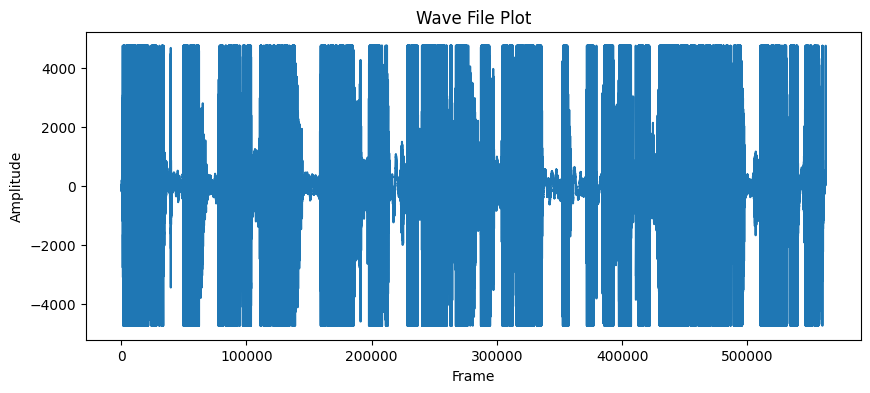

In [74]:
WaveObject.display_waveform_from_audiosegment(audio__)

In [75]:
print(f"median: {get_median_dBFS(normalized_data)}")
for filename in normalized_data.iterdir():
    if filename.suffix != ".wav":
        continue
    audio = AudioSegment.from_file(str(filename), format="wav")
    print(f"{filename.name}: {audio.dBFS}")

median: -21.553987442786596
weird_normalized.wav: -21.553987442786596
music2_normalized.wav: -21.553987442786596
music3_normalized.wav: -21.553987442786596
voice1_normalized.wav: -21.553987442786596
music1_normalized.wav: -21.553987442786596
voice3_normalized.wav: -21.557158054115128
voice2_normalized.wav: -21.553987442786596


In [77]:
def normalize_headspace(path, new_path, headspace_dBFS):
    os.makedirs(new_path, exist_ok=True)
    """Normalizes all .wav files in the given directory given headspace."""
    for filename in path.iterdir():
        if filename.suffix != ".wav":
            continue
        audio = AudioSegment.from_file(str(path / filename), format="wav")
        audio = audio.normalize(headspace_dBFS)
        filename = filename.stem + "_normalized.wav"
        audio.export(str(new_path / filename), format="wav")

In [79]:
normalize_headspace(test_data, tests_path / "normalzied_headspace_data", 0.1)

In [80]:
_audio = AudioSegment.from_file(str(tests_path / "normalzied_headspace_data" / "voice1_normalized.wav"), format="wav")

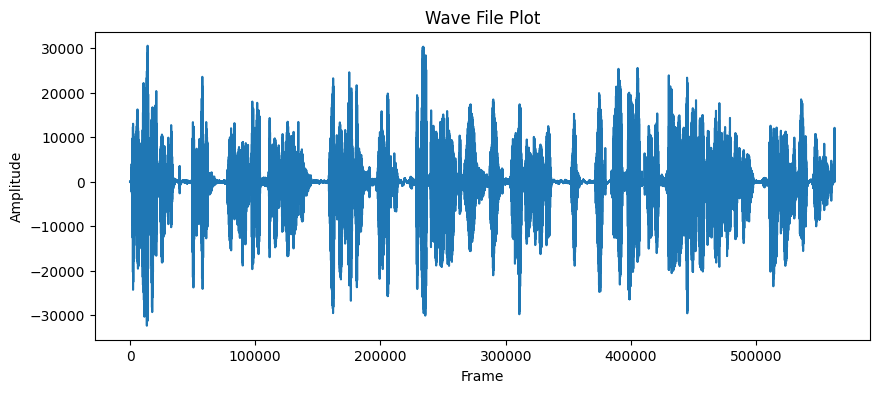

In [82]:
WaveObject.display_waveform_from_audiosegment(_audio)

In [83]:
head_norm_data = tests_path / "normalzied_headspace_data"

In [84]:
print(f"median: {get_median_dBFS(head_norm_data)}")
for filename in head_norm_data.iterdir():
    if filename.suffix != ".wav":
        continue
    audio = AudioSegment.from_file(str(filename), format="wav")
    print(f"{filename.name}: {audio.dBFS}")

median: -18.84460215690592
weird_normalized.wav: -4.879601526879456
music2_normalized.wav: -19.07028343291873
music3_normalized.wav: -21.652818598530992
voice1_normalized.wav: -17.918784282424383
music1_normalized.wav: -18.328813902727486
voice3_normalized.wav: -23.014227598086382
voice2_normalized.wav: -18.84460215690592
